<a href="https://colab.research.google.com/github/pabodiniudari/Machine-learning/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.feature_selection import mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# **Data Exploration and Preprocessing:**

In [ ]:
path = '/content/ObesityDataSet_raw_and_data_sinthetic.csv'

df = pd.read_csv(path)
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [ ]:
df.shape

(2111, 17)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
dupli = df.duplicated()
num_dupli = dupli.sum()
print("Number of duplicates:", num_dupli)

Number of duplicates: 24


In [ ]:
clean_df = df.drop_duplicates()
clean_df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2087 rows x 17 columns]

In [ ]:
inf =clean_df.isin([np.inf, -np.inf]).any().any()#Reference :kaggle workbook "Kapturov's solution of PS S4E2"

inf

False

In [ ]:
clean_df['Age'] = clean_df['Age'].astype(int)
clean_df['Age'].dtype
clean_df['Age']


0       21
1       21
2       23
3       27
4       22
        ..
2106    20
2107    21
2108    22
2109    24
2110    23
Name: Age, Length: 2087, dtype: int64

In [ ]:
clean_df.shape

(2087, 17)

In [ ]:
display(clean_df.describe().T)

count       mean        std    min        25%        50%         75%  \
Age     2087.0  24.009104   6.333297  14.00  19.000000  22.000000   26.000000   
Height  2087.0   1.702674   0.093186   1.45   1.630178   1.701584    1.769491   
Weight  2087.0  86.858730  26.190847  39.00  66.000000  83.101100  108.015907   
FCVC    2087.0   2.421466   0.534737   1.00   2.000000   2.396265    3.000000   
NCP     2087.0   2.701179   0.764614   1.00   2.697467   3.000000    3.000000   
CH2O    2087.0   2.004749   0.608284   1.00   1.590922   2.000000    2.466193   
FAF     2087.0   1.012812   0.853475   0.00   0.124505   1.000000    1.678102   
TUE     2087.0   0.663035   0.608153   0.00   0.000000   0.630866    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00

In [ ]:
clean_df.to_csv("cleaned data.csv")

In [ ]:
def Outliers(clean_df):
    out_count = {}

    for col in clean_df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1

        l_bound = Q1 - 1.5 * IQR
        u_bound = Q3 + 1.5 * IQR

        outliers = clean_df[(clean_df[col] < l_bound) | (clean_df[col] > u_bound)]
        out = outliers.shape[0]

        out_count[col] = out

    return out_count

out_count = Outliers(clean_df)

out_df = pd.DataFrame.from_dict(out_count, orient='index', columns=['Outlier Count'])
print(out_df)


        Outlier Count
Age               167
Height              1
Weight              1
FCVC                0
NCP               577
CH2O                0
FAF                 0
TUE                 0


In [ ]:
cate_col = clean_df.drop('NObeyesdad', axis=1).select_dtypes(include=['object']).columns
Df= pd.get_dummies(clean_df.drop('NObeyesdad', axis=1), columns=cate_col, drop_first=True)
DF = clean_df[['NObeyesdad']]

encode = OrdinalEncoder()
DF['NObeyesdad'] = encode.fit_transform(DF[['NObeyesdad']])

df_enc = pd.concat([Df, DF], axis=1)

In [ ]:
num_col = df_enc.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_enc[num_col] = scaler.fit_transform(df_enc[num_col])

In [ ]:
df_enc.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.526613 -0.887408 -0.872985 -0.788364  0.390906 -0.007810 -1.186977   
1 -0.526613 -1.960788 -1.178508  1.082164  0.390906  1.636552  2.328908   
2 -0.212507  1.044677 -0.376509 -0.788364  0.390906 -0.007810  1.156947   
3  0.415705  1.044677  0.005395  1.082164  0.390906 -0.007810  1.156947   
4 -0.369560  0.830001  0.112328 -0.788364 -2.225418 -0.007810 -1.186977   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  SCC_yes  \
0  0.554211        False                                True  ...    False   
1 -1.090505        False                                True  ...     True   
2  0.554211         True                                True  ...    False   
3 -1.090505         True                               False  ...    False   
4 -1.090505         True                               False  ...    False   

   CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0            False           False     True        False             False   
1            False            True    False        False             False   
2             True           False    False        False             False   
3             True           False    False        False             False   
4            False            True    False        False             False   

   MTRANS_Public_Transportation  MTRANS_Walking  NObeyesdad  Cluster  
0                          True           False   -1.034072      5.0  
1                          True           False   -1.034072      0.0  
2                          True           False   -1.034072      3.0  
3                         False            True    1.019313      1.0  
4                          True           False    1.532660      0.0  

[5 rows x 25 columns]

# **Exploratory Data Analysis (EDA):**


In [ ]:
display(df_enc.describe().T)

count          mean       std       min       25%       50%  \
Age         2087.0 -1.634214e-16  1.000240 -1.625984 -0.696868 -0.236439   
Height      2087.0  8.851994e-16  1.000240 -2.712155 -0.778154 -0.011701   
Weight      2087.0 -5.447381e-17  1.000240 -1.827745 -0.796604 -0.143505   
FCVC        2087.0 -5.447381e-16  1.000240 -2.658892 -0.788364 -0.047139   
NCP         2087.0  1.736353e-16  1.000240 -2.225418 -0.004856  0.390906   
CH2O        2087.0  4.085536e-16  1.000240 -1.652172 -0.680483 -0.007810   
FAF         2087.0  2.587506e-16  1.000240 -1.186977 -1.041062 -0.015015   
TUE         2087.0 -1.089476e-16  1.000240 -1.090505 -1.090505 -0.052910   
NObeyesdad  2087.0  2.723690e-17  1.000240 -1.547418 -1.034072 -0.007379   
Cluster     2063.0  2.746970e+00  2.177604  0.000000  1.000000  3.000000   

                 75%       max  
Age         0.258652  5.755509  
Height      0.717205  2.976762  
Weight      0.808002  3.289772  
FCVC        1.082164  1.082164  
NCP         0.390906  1.699068  
CH2O        0.758779  1.636552  
FAF         0.779695  2.328908  
TUE         0.554211  2.198928  
NObeyesdad  1.019313  1.532660  
Cluster     5.000000  6.000000

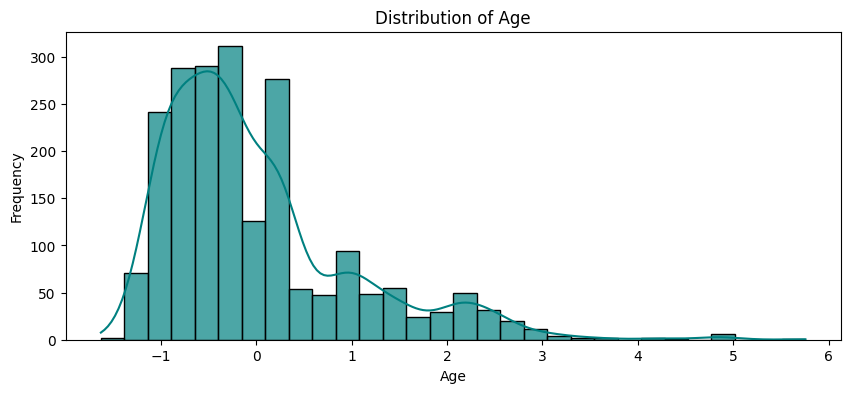

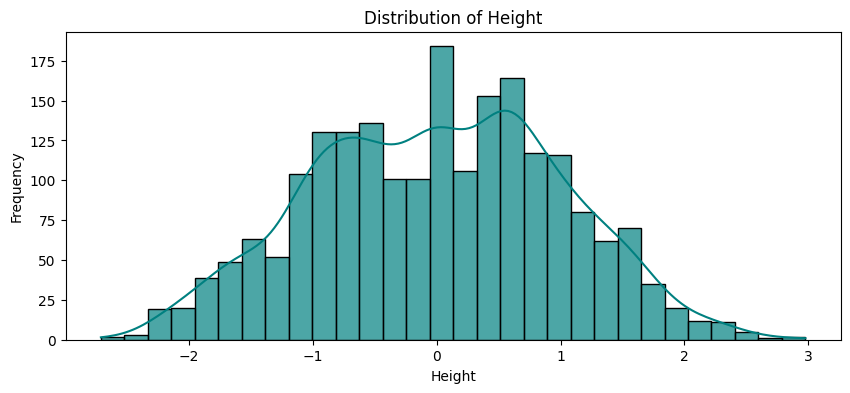

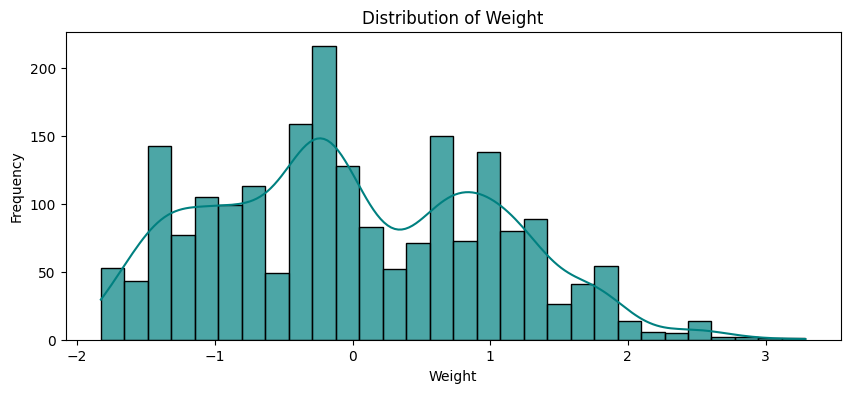

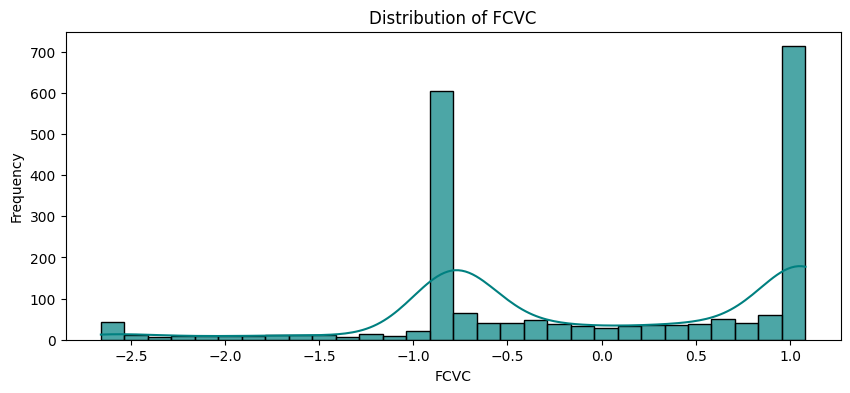

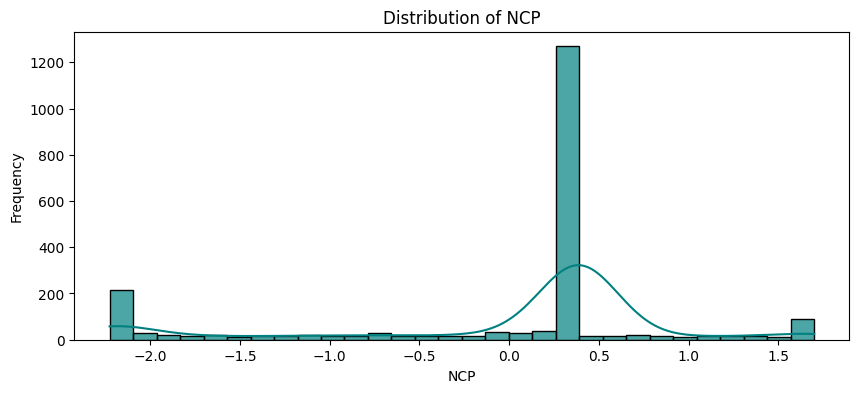

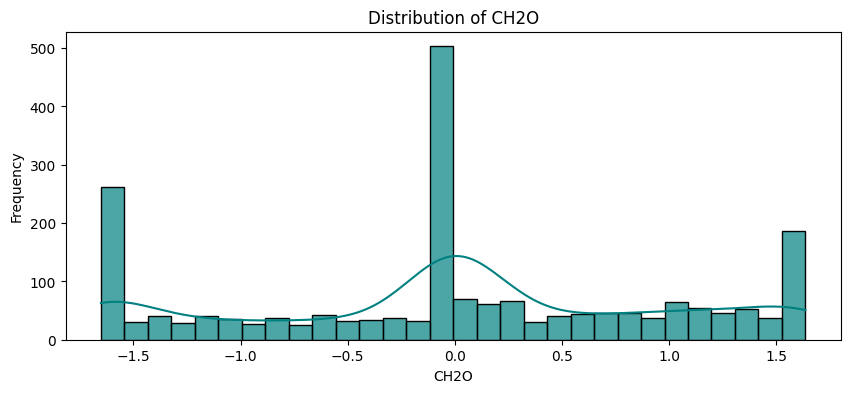

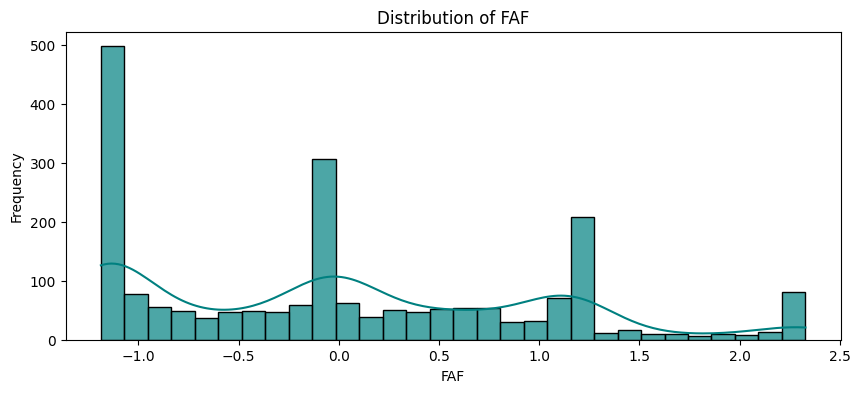

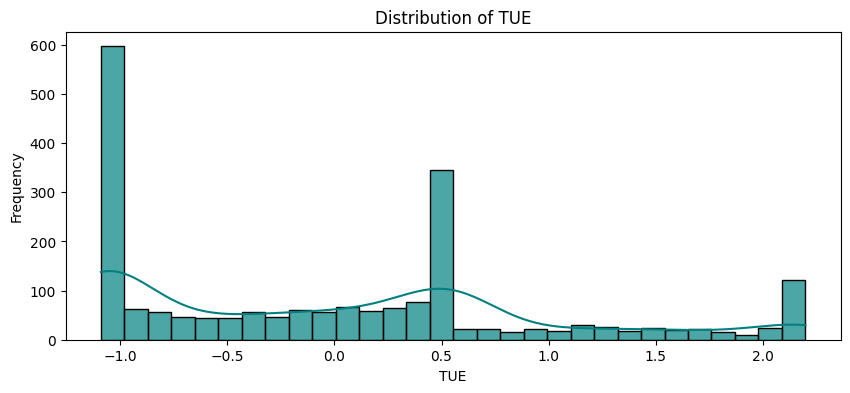

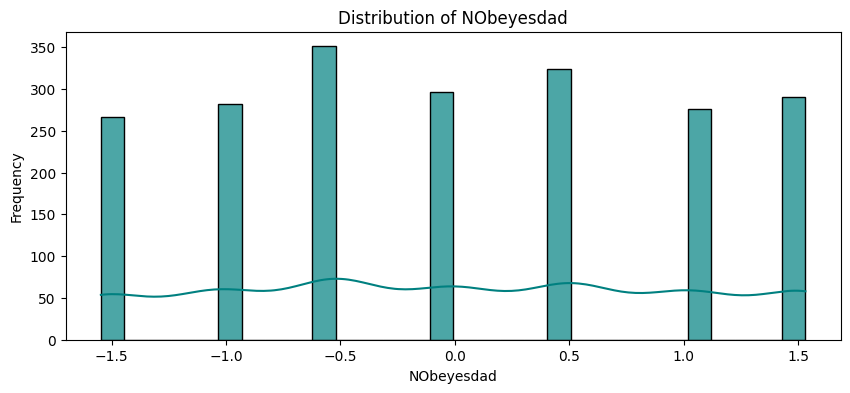

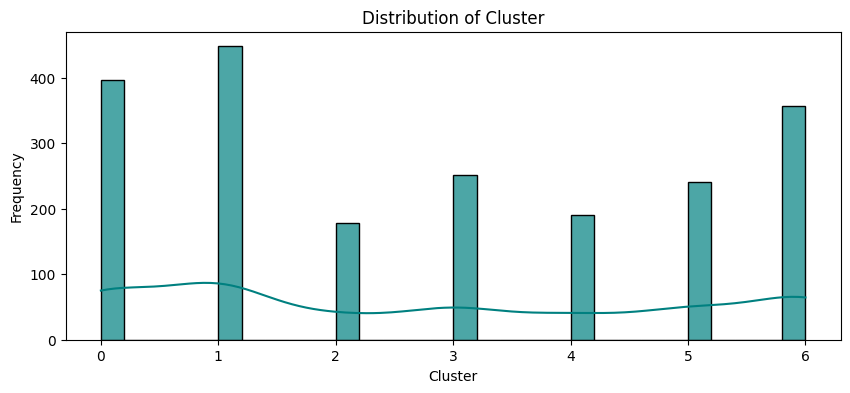

In [ ]:
num_cols = df_enc.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_enc[col], bins=30, kde=True, edgecolor='k', alpha=0.7, color ="teal")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


    plt.show()

In [ ]:
value_counts = df['FCVC'].value_counts()

print(value_counts)

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64


In [ ]:
value_counts = df['NCP'].value_counts()

print(value_counts)

NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64


In [ ]:
value_counts = df['CH2O'].value_counts()

print(value_counts)

CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.863513      1
Name: count, Length: 1268, dtype: int64


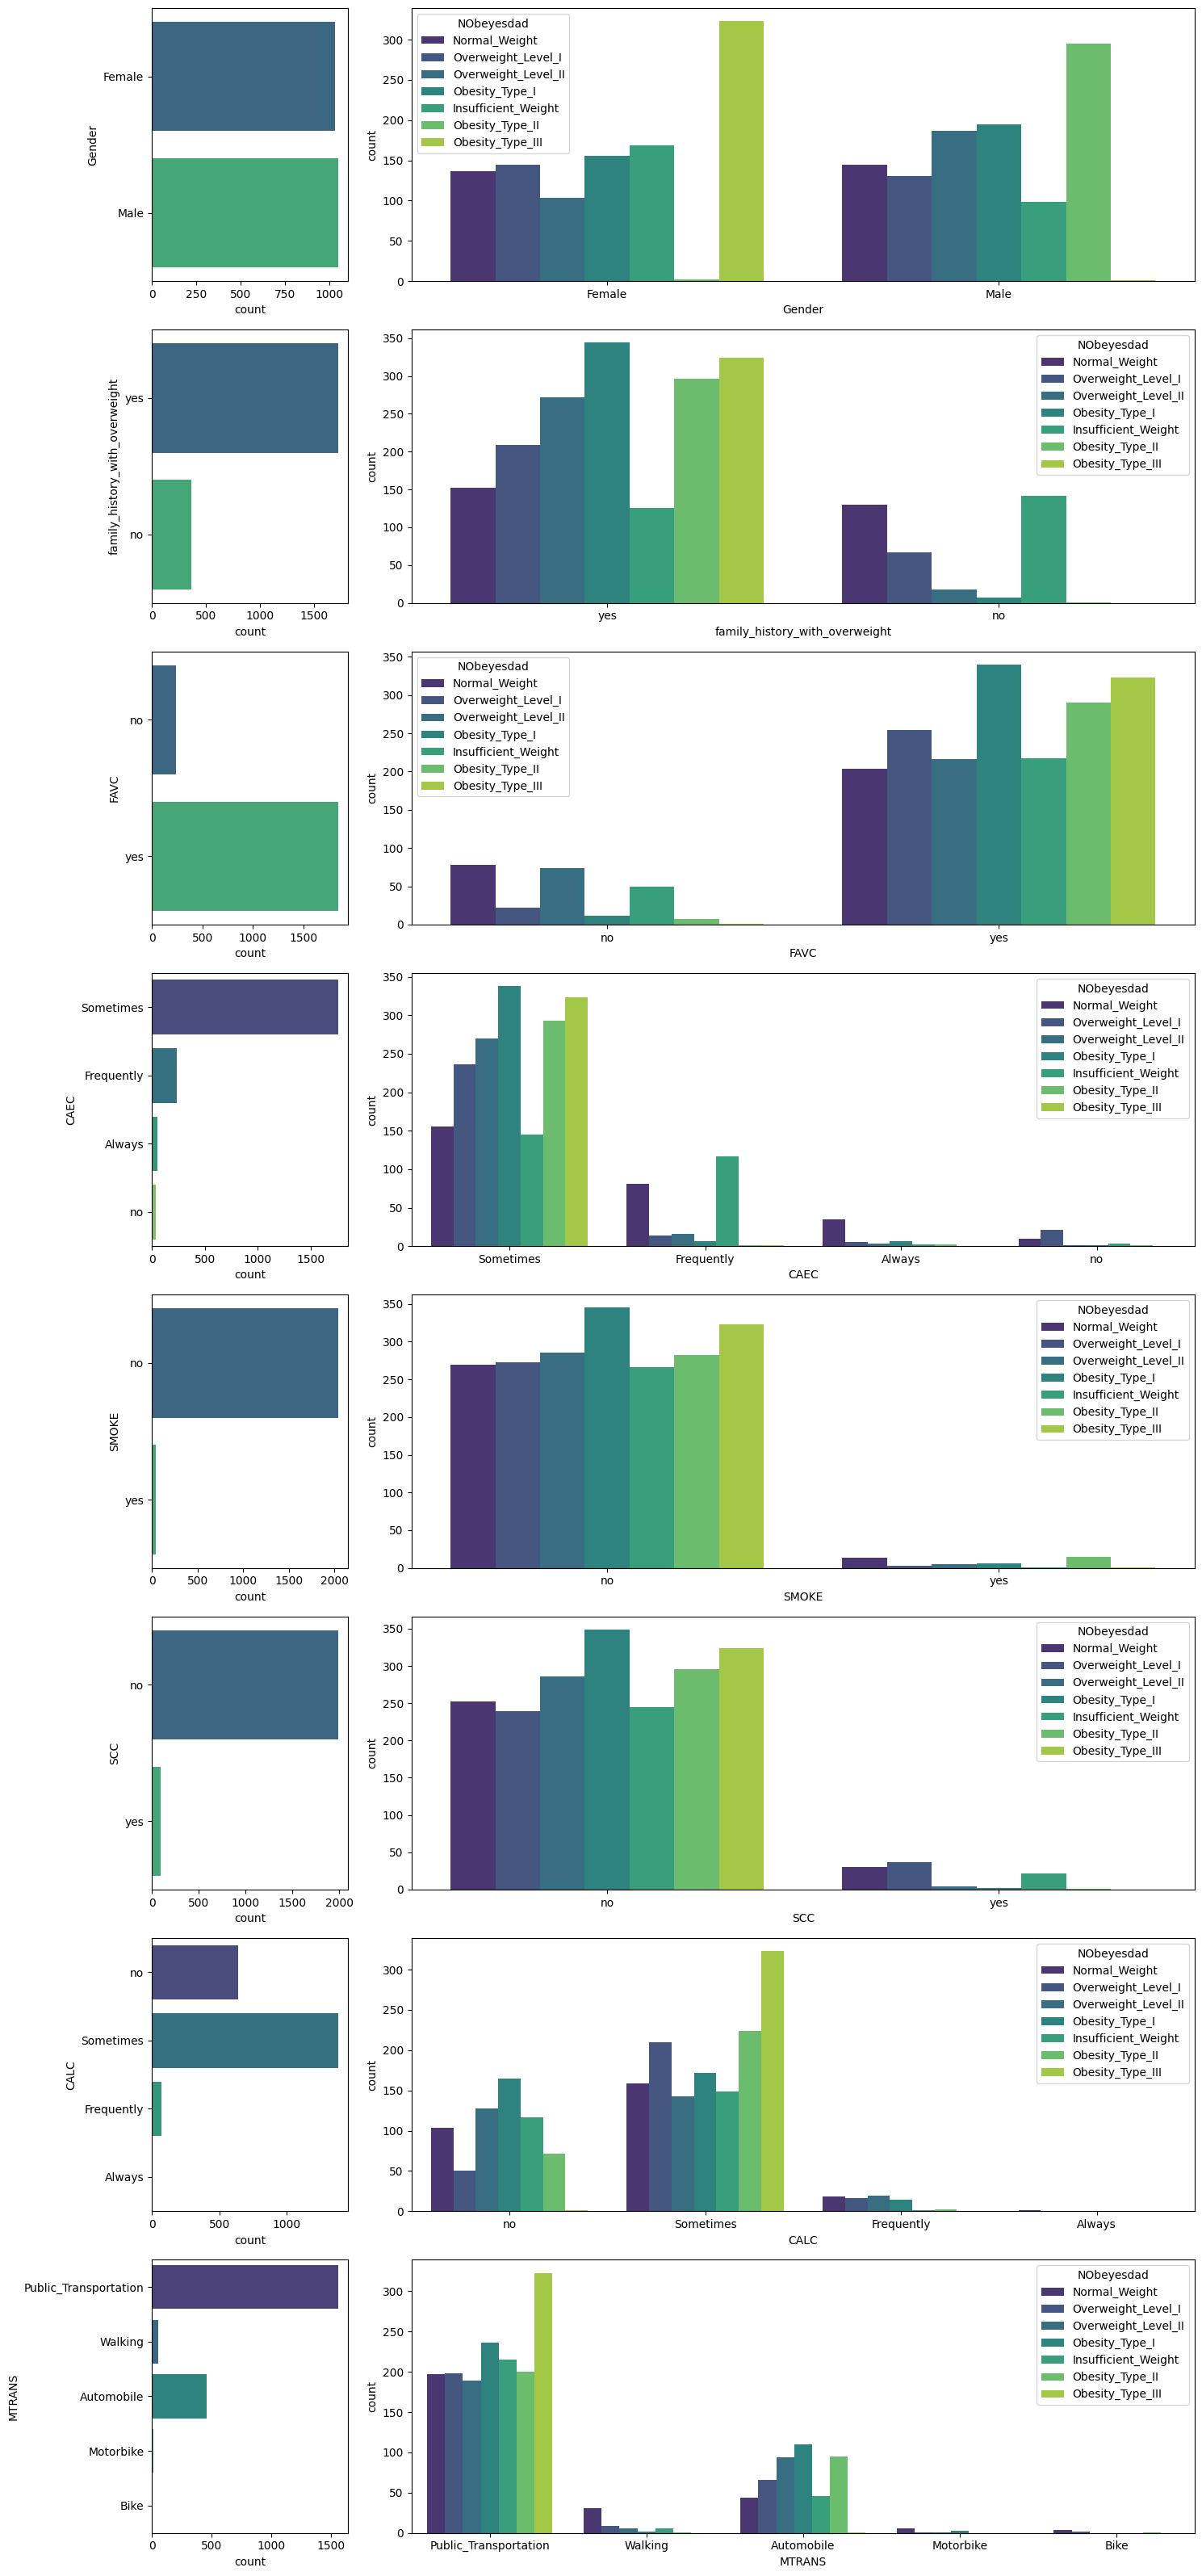

In [ ]:
#reference from kaggle workbook "Obesity Risk Prediction (Multi-Class) [0.92160]"
Target_var = 'NObeyesdad'
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

_, axs = plt.subplots(len(cat_col), 2, figsize=(15, len(cat_col) * 4), width_ratios=[1, 4])

for i, col in enumerate(cat_col):
    sns.countplot(y=col, data=clean_df, palette="viridis", ax=axs[i, 0])
    sns.countplot(x=col, data=clean_df, hue=Target_var, palette="viridis", ax=axs[i, 1])
    axs[i, 0].set_ylabel(col)
plt.tight_layout()
plt.show()

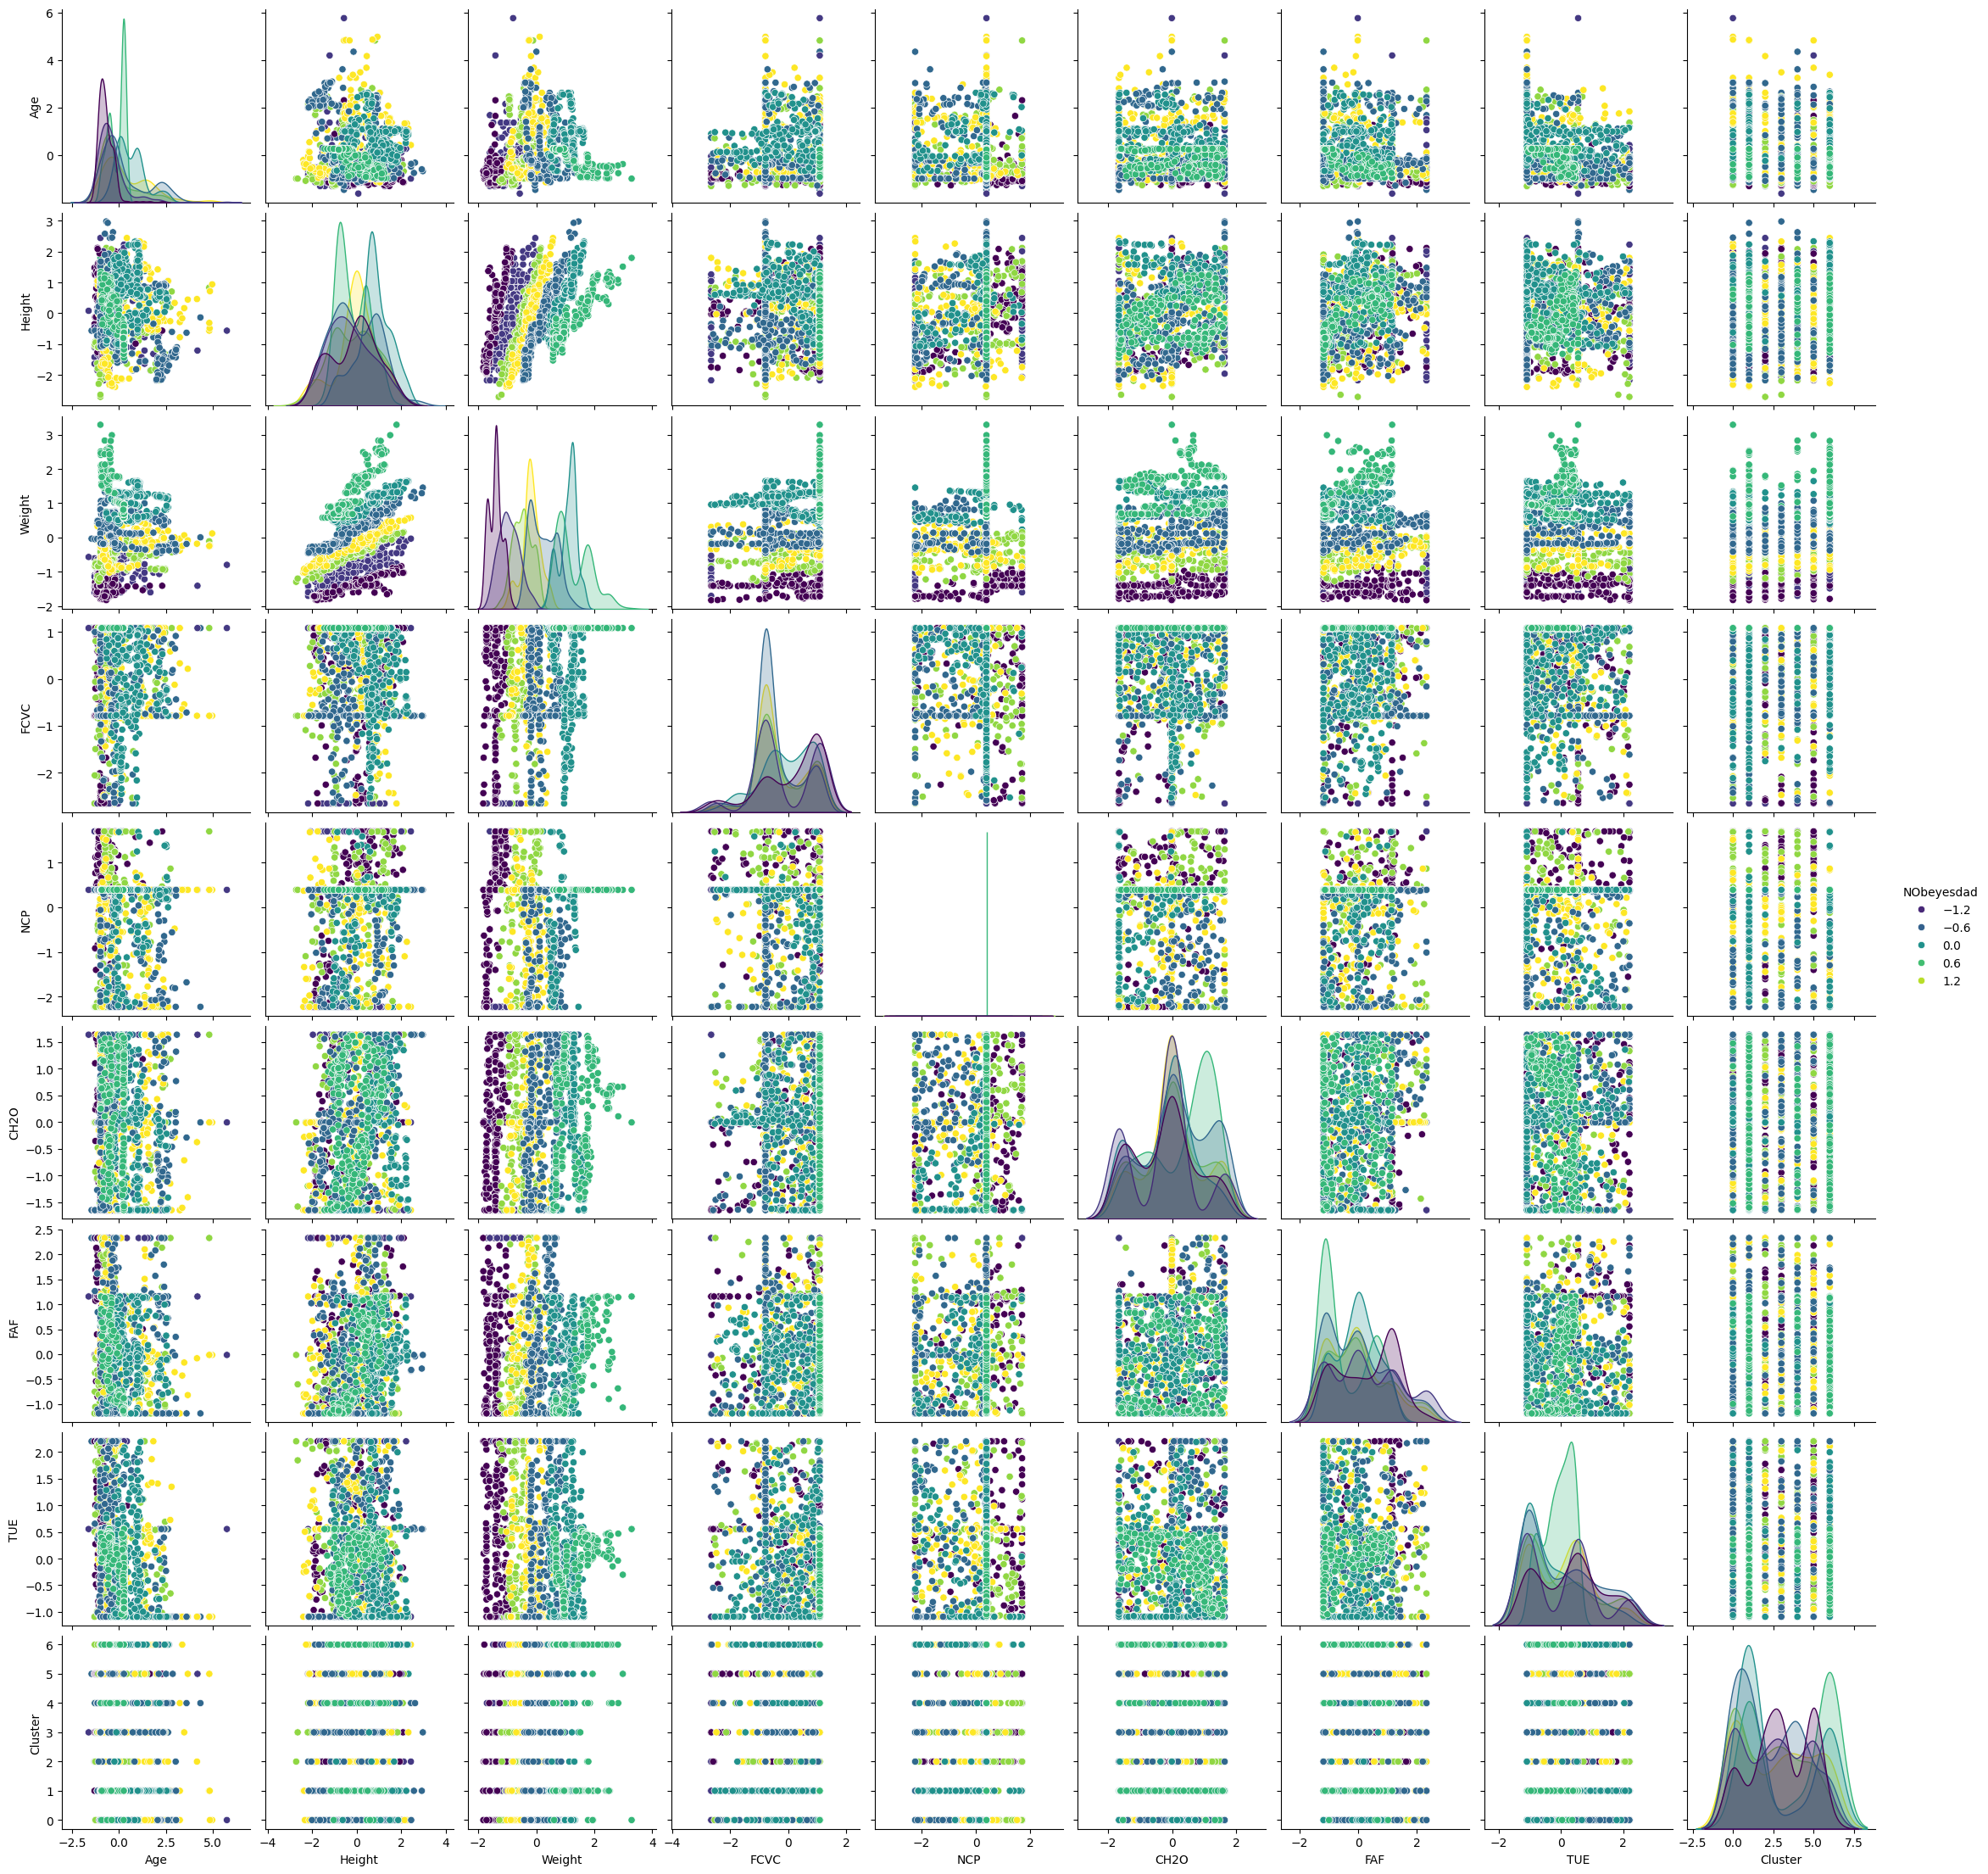

In [ ]:
num_col = df_enc.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df_enc[num_col], hue='NObeyesdad', palette='viridis')
plt.show()

In [ ]:
data = df_enc.drop(columns=['NObeyesdad']).apply(pd.to_numeric, errors='coerce')
data = data.astype(float)

In [ ]:
data.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.526613 -0.887408 -0.872985 -0.788364  0.390906 -0.007810 -1.186977   
1 -0.526613 -1.960788 -1.178508  1.082164  0.390906  1.636552  2.328908   
2 -0.212507  1.044677 -0.376509 -0.788364  0.390906 -0.007810  1.156947   
3  0.415705  1.044677  0.005395  1.082164  0.390906 -0.007810  1.156947   
4 -0.369560  0.830001  0.112328 -0.788364 -2.225418 -0.007810 -1.186977   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  CAEC_no  \
0  0.554211          0.0                                 1.0  ...      0.0   
1 -1.090505          0.0                                 1.0  ...      0.0   
2  0.554211          1.0                                 1.0  ...      0.0   
3 -1.090505          1.0                                 0.0  ...      0.0   
4 -1.090505          1.0                                 0.0  ...      0.0   

   SMOKE_yes  SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0        0.0      0.0              0.0             0.0      1.0          0.0   
1        1.0      1.0              0.0             1.0      0.0          0.0   
2        0.0      0.0              1.0             0.0      0.0          0.0   
3        0.0      0.0              1.0             0.0      0.0          0.0   
4        0.0      0.0              0.0             1.0      0.0          0.0   

   MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0               0.0                           1.0             0.0  
1               0.0                           1.0             0.0  
2               0.0                           1.0             0.0  
3               0.0                           0.0             1.0  
4               0.0                           1.0             0.0  

[5 rows x 23 columns]

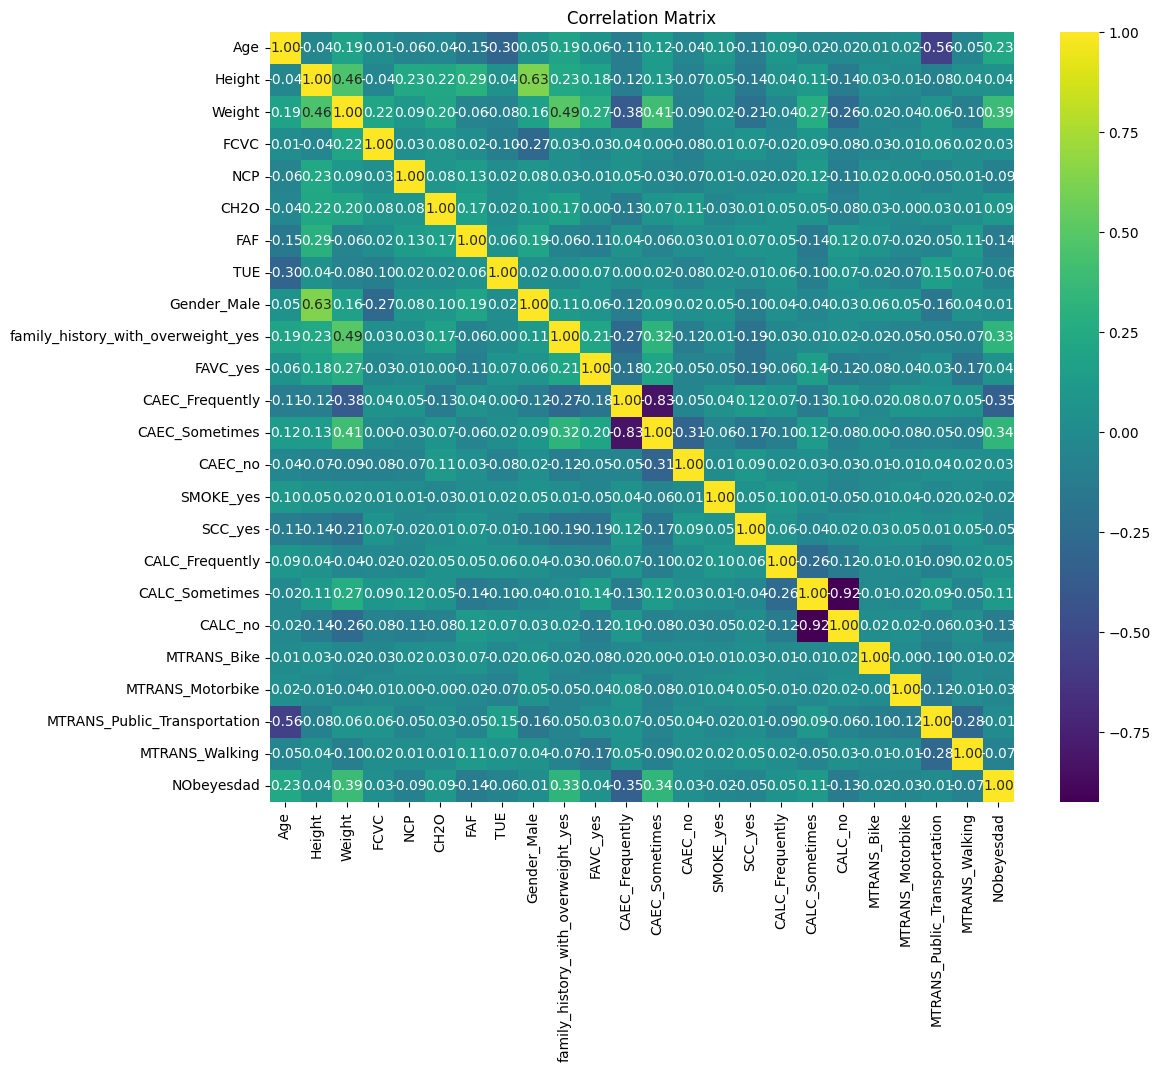

In [ ]:
cor_matrix = df_enc.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Initial VIF:
                               Features        VIF
0                                  Age   2.040373
1                               Height   2.668153
2                               Weight   2.387596
3                                 FCVC   1.237716
4                                  NCP   1.103460
5                                 CH2O   1.147623
6                                  FAF   1.257507
7                                  TUE   1.175702
8                          Gender_Male   3.935668
9   family_history_with_overweight_yes   8.342554
10                            FAVC_yes  10.291987
11                     CAEC_Frequently   5.468538
12                      CAEC_Sometimes  35.228844
13                             CAEC_no   1.755564
14                           SMOKE_yes   1.067084
15                             SCC_yes   1.172120
16                     CALC_Frequently   2.857793
17                      CALC_Sometimes  41.939463
18                             CALC_

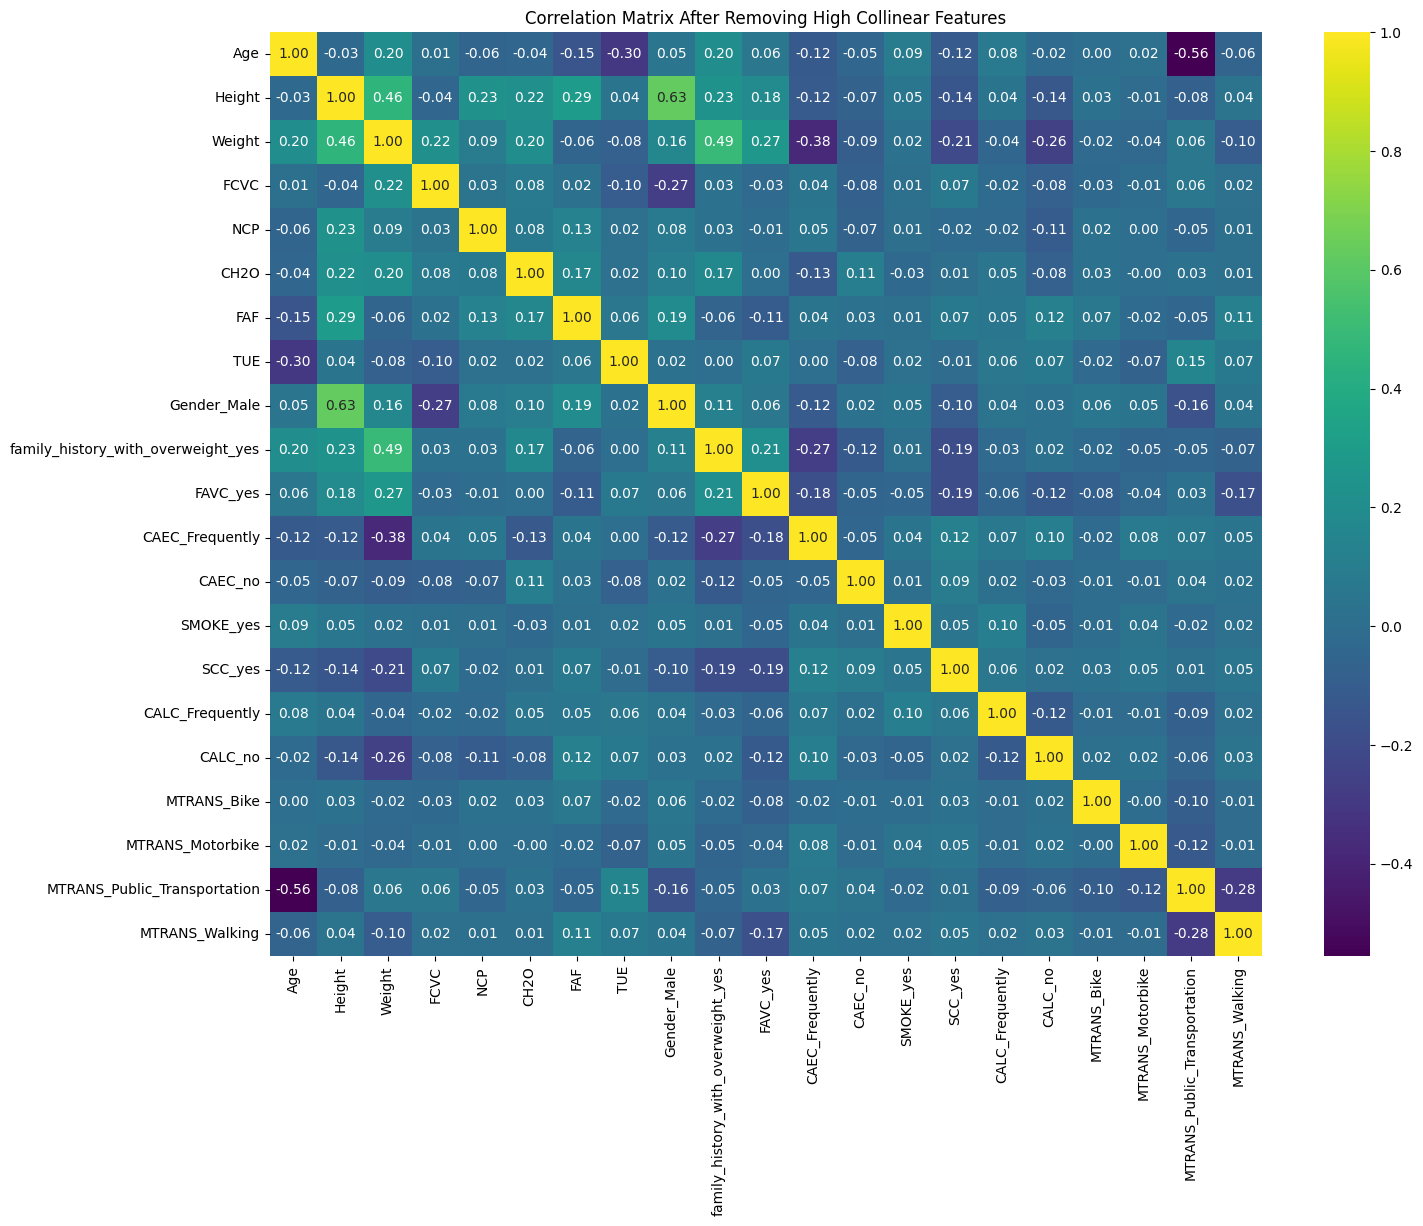

In [ ]:
def cal_vif(data):
    VIF = pd.DataFrame()
    VIF['Features'] = data.columns
    VIF['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return VIF

def high_vif_ft(data, threshold=10.0):
    while True:
        Vif = cal_vif(data)
        high_vif = Vif['VIF'].max()
        if high_vif > threshold:
            ft_to_remove = Vif[Vif['VIF'] == high_vif]['Features'].values[0]
            print(f'Removing feature {ft_to_remove} with VIF: {high_vif}')
            data = data.drop(columns=[ft_to_remove])
        else:
            break
    return data

VIF_df = cal_vif(data)
print("Initial VIF:\n", VIF_df)

Ft_reduced = high_vif_ft(data, threshold=10.0)
final_df = cal_vif(Ft_reduced)
print("Final VIF:\n", final_df)

correlation_matrix = Ft_reduced.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix After Removing High Collinear Features')
plt.show()

In [ ]:
Ft_reduced.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.475238 -0.887408 -0.872985 -0.788364  0.390906 -0.007810 -1.186977   
1 -0.475238 -1.960788 -1.178508  1.082164  0.390906  1.636552  2.328908   
2 -0.159371  1.044677 -0.376509 -0.788364  0.390906 -0.007810  1.156947   
3  0.472363  1.044677  0.005395  1.082164  0.390906 -0.007810  1.156947   
4 -0.317305  0.830001  0.112328 -0.788364 -2.225418 -0.007810 -1.186977   

        TUE  Gender_Male  family_history_with_overweight_yes  ...  \
0  0.554211          0.0                                 1.0  ...   
1 -1.090505          0.0                                 1.0  ...   
2  0.554211          1.0                                 1.0  ...   
3 -1.090505          1.0                                 0.0  ...   
4 -1.090505          1.0                                 0.0  ...   

   CAEC_Frequently  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  CALC_no  \
0              0.0      0.0        0.0      0.0              0.0      1.0   
1              0.0      0.0        1.0      1.0              0.0      0.0   
2              0.0      0.0        0.0      0.0              1.0      0.0   
3              0.0      0.0        0.0      0.0              1.0      0.0   
4              0.0      0.0        0.0      0.0              0.0      0.0   

   MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  MTRANS_Walking  
0          0.0               0.0                           1.0             0.0  
1          0.0               0.0                           1.0             0.0  
2          0.0               0.0                           1.0             0.0  
3          0.0               0.0                           0.0             1.0  
4          0.0               0.0                           1.0             0.0  

[5 rows x 21 columns]

# **Model Training and Evaluation:**


In [ ]:
X = Ft_reduced
y = df_enc['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_rf_train = rf.predict(X_train)
y_rf = rf.predict(X_test)
print("Random Forest Training Classification Report:\n", classification_report(y_train, y_rf_train))
print("Random Forest Training Accuracy:", accuracy_score(y_train, y_rf_train))
print("Random Forest Classification Report:\n", classification_report(y_test, y_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf))

Random Forest Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       208
         1.0       1.00      1.00      1.00       221
         2.0       1.00      1.00      1.00       281
         3.0       1.00      1.00      1.00       233
         4.0       1.00      1.00      1.00       264
         5.0       1.00      1.00      1.00       221
         6.0       1.00      1.00      1.00       241

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

Random Forest Training Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        59
         1.0       0.83      0.95      0.89        61
         2.0       0.99      0.97      0.98        70
         3.0       1.00      0.98      0.99        64
         4

In [ ]:
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

y_xgb_train = xgb.predict(X_train)
y_xgb = xgb.predict(X_test)
print("XGBoost Training Classification Report:\n", classification_report(y_train, y_xgb_train))
print("XGBoost Training Accuracy:", accuracy_score(y_train, y_xgb_train))
print("XGBoost Classification Report:\n", classification_report(y_test, y_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_xgb))

XGBoost Training Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       208
         1.0       1.00      1.00      1.00       221
         2.0       1.00      1.00      1.00       281
         3.0       1.00      1.00      1.00       233
         4.0       1.00      1.00      1.00       264
         5.0       1.00      1.00      1.00       221
         6.0       1.00      1.00      1.00       241

    accuracy                           1.00      1669
   macro avg       1.00      1.00      1.00      1669
weighted avg       1.00      1.00      1.00      1669

XGBoost Training Accuracy: 1.0
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        59
         1.0       0.91      0.87      0.89        61
         2.0       1.00      0.99      0.99        70
         3.0       1.00      1.00      1.00        64
         4.0       1.00     

# **Hyperparameter Tuning:**


In [ ]:
#Reference :kaggle workbook "Kapturov's solution of PS S4E2"

In [ ]:
def objective_rf(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        criterion=trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss']),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 100),
        max_depth=trial.suggest_int("max_depth", 1, 100),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 100),
        random_state=27
    )
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    return test_acc

sampler = TPESampler(seed=27)
study_rf = optuna.create_study(study_name="random_forest", direction="maximize", sampler=sampler)
study_rf.optimize(objective_rf, n_trials=100)

print("Number of finished trials: ", len(study_rf.trials))
print("Best trial:")
trial = study_rf.best_trial
print("  Value (Test Accuracy): ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_para_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_para_rf, random_state=27)
best_rf_model.fit(X_train, y_train)

train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

print("Tuned Random Forest Training Accuracy:", train_acc)
print("Tuned Random Forest Testing Accuracy:", test_acc)


Number of finished trials:  100
Best trial:
  Value (Test Accuracy):  0.9617224880382775
  Params: 
    n_estimators: 842
    criterion: log_loss
    min_samples_leaf: 2
    max_depth: 76
    min_samples_split: 5
Tuned Random Forest Training Accuracy: 0.9964050329538646
Tuned Random Forest Testing Accuracy: 0.9617224880382775


In [ ]:
def objective_xgb(trial):
    model = XGBClassifier(
        max_depth=trial.suggest_int('max_depth', 1, 100),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        n_estimators=trial.suggest_int('n_estimators', 50, 1000),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        gamma=trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        subsample=trial.suggest_float('subsample', 0.01, 1.0, log=True),
        colsample_bytree=trial.suggest_float('colsample_bytree', 0.01, 1.0, log=True),
        reg_alpha=trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        reg_lambda=trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=27
    )
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    return test_acc

optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=27)
study_xgb = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study_xgb.optimize(objective_xgb, n_trials=100)

print("Number of finished trials: ", len(study_xgb.trials))
print("Best trial:")
trial_xgb = study_xgb.best_trial
print("  Value: ", trial_xgb.value)
print("  Params: ")
for key, value in trial_xgb.params.items():
    print(f"    {key}: {value}")

best_para_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_para_xgb, random_state=27)
best_xgb_model.fit(X_train, y_train)

y_pred_train_xgb = best_xgb_model.predict(X_train)
train_acc_xgb = accuracy_score(y_train, y_pred_train_xgb)

y_pred_test_xgb = best_xgb_model.predict(X_test)
test_acc_xgb = accuracy_score(y_test, y_pred_test_xgb)

print("Training Accuracy (Tuned XGB):", train_acc_xgb)
print("Testing Accuracy (Tuned XGB):", test_acc_xgb)


Number of finished trials:  100
Best trial:
  Value:  0.9784688995215312
  Params: 
    max_depth: 22
    learning_rate: 0.024101626939201214
    n_estimators: 278
    min_child_weight: 1
    gamma: 0.000389894075826015
    subsample: 0.2055327977489229
    colsample_bytree: 0.7651600346582833
    reg_alpha: 4.535839976825009e-06
    reg_lambda: 0.00011919393753230057
Training Accuracy (Tuned XGB): 0.9934092270820851
Testing Accuracy (Tuned XGB): 0.9784688995215312


# **Comparison and Conclusion**

In [ ]:
best_params_xgb = {
    'max_depth': 22,
    'learning_rate': 0.024101626939201214,
    'n_estimators': 278,
    'min_child_weight': 1,
    'gamma': 0.000389894075826015,
    'subsample': 0.2055327977489229,
    'colsample_bytree': 0.7651600346582833,
    'reg_alpha': 4.535839976825009e-06,
    'reg_lambda': 0.00011919393753230057,
    'random_state': 27
}

xgb_model = XGBClassifier(**best_params_xgb, eval_metric='mlogloss', use_label_encoder=False)

cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print("XGBClassifier Cross-Validation Scores:", cv_scores)
print("XGBClassifier Mean Cross-Validation Accuracy:", cv_scores.mean())


XGBClassifier Cross-Validation Scores: [0.94311377 0.93413174 0.96107784 0.94610778 0.96396396]
XGBClassifier Mean Cross-Validation Accuracy: 0.949679020337703


In [ ]:
xgb_model.fit(X_train, y_train)

train_accuracy = xgb_model.score(X_train, y_train)
print("Final Model Training Accuracy:", train_accuracy)


Final Model Training Accuracy: 0.9934092270820851


In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Final Model Testing Accuracy:", test_accuracy)

print("Final Model Classification Report:\n", classification_report(y_test, y_pred_xgb))


Final Model Testing Accuracy: 0.9784688995215312
Final Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        59
         1.0       0.93      0.92      0.93        61
         2.0       1.00      1.00      1.00        70
         3.0       1.00      1.00      1.00        64
         4.0       1.00      1.00      1.00        60
         5.0       0.95      0.95      0.95        55
         6.0       1.00      1.00      1.00        49

    accuracy                           0.98       418
   macro avg       0.98      0.98      0.98       418
weighted avg       0.98      0.98      0.98       418



# **Clustering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt



In [ ]:
#reference from kaggle workbook "Obesity Risk Prediction (Multi-Class) [0.92160]" and https://rpubs.com/ztk_99/1143926

In [ ]:
def hopkins(X):
    from sklearn.neighbors import NearestNeighbors
    import numpy as np
    from random import sample
    from numpy.random import uniform

    n, d = X.shape
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    rand_X = sample(range(n), m)
    ujd = []
    wjd = []

    for j in range(m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X, axis=0), np.amax(X, axis=0), d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = np.sum(ujd) / (np.sum(ujd) + np.sum(wjd))
    return H

Ft_reduced.reset_index(drop=True, inplace=True)

hopkins = hopkins(Ft_reduced)
print(f"Hopkins Statistic: {hopkins}")


Hopkins Statistic: 0.8060662643841177


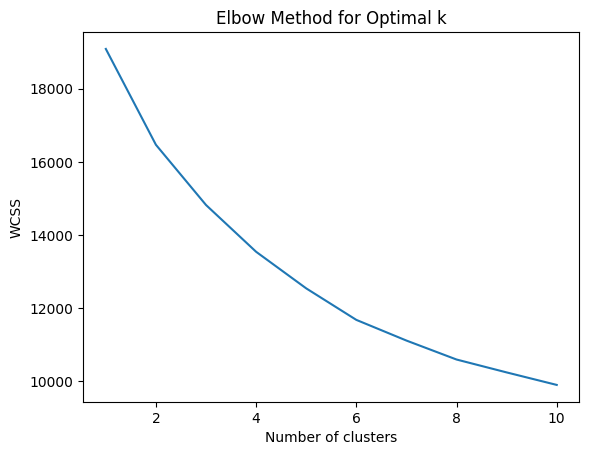

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(Ft_reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
RANDOM_SEED = 27
clust_range = range(2, 11)

sil_score = {}

for n_clusters in clust_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_SEED)
    clust = kmeans.fit_predict(Ft_reduced)
    score = silhouette_score(Ft_reduced, clust)
    sil_score[n_clusters] = score

# Print silhouette scores
for clust, score in sil_score.items():
    print(f"Number of clusters: {clust}, Silhouette Score: {score:.4f}")

# Determine the optimal number of clusters
opti_clust = max(sil_score, key=sil_score.get)
print(f'Optimal number of clusters based on silhouette score: {opti_clust}')


Number of clusters: 2, Silhouette Score: 0.1310
Number of clusters: 3, Silhouette Score: 0.1289
Number of clusters: 4, Silhouette Score: 0.1554
Number of clusters: 5, Silhouette Score: 0.1528
Number of clusters: 6, Silhouette Score: 0.1519
Number of clusters: 7, Silhouette Score: 0.1550
Number of clusters: 8, Silhouette Score: 0.1475
Number of clusters: 9, Silhouette Score: 0.1534
Number of clusters: 10, Silhouette Score: 0.1560
Optimal number of clusters based on silhouette score: 10


Agglomerative Clustering Silhouette Score: 0.1311


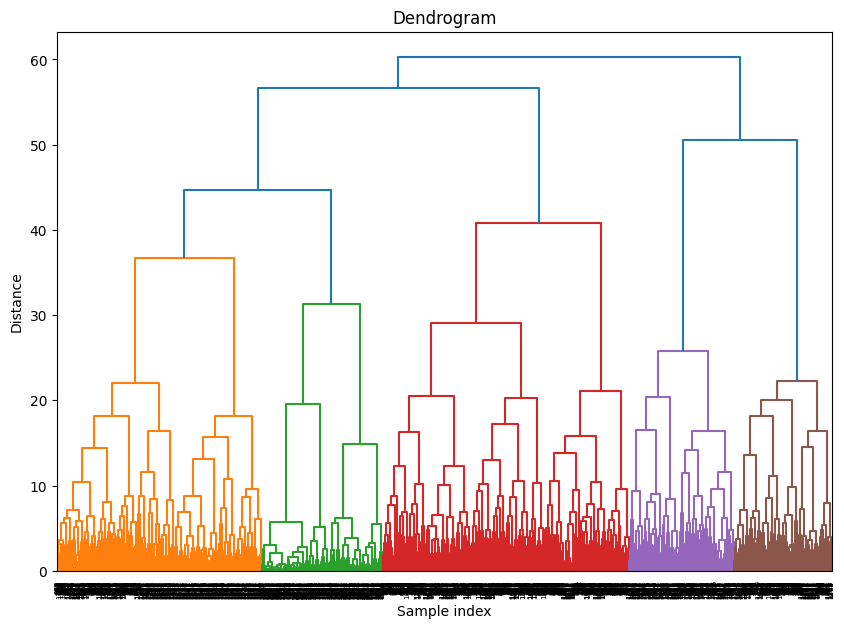

In [ ]:
opti_k = 10

agg_clust = AgglomerativeClustering(n_clusters=opti_k, affinity='euclidean', linkage='ward')
agg_lab = agg_clust.fit_predict(Ft_reduced)

sil_avg = silhouette_score(Ft_reduced, agg_lab)
print(f'Agglomerative Clustering Silhouette Score: {sil_avg:.4f}')

link = linkage(Ft_reduced, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(link,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


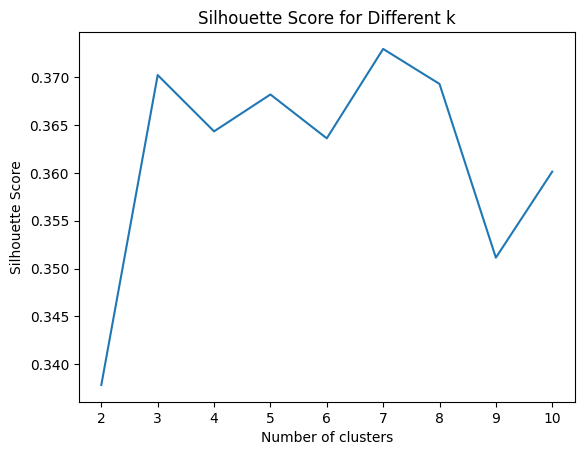

In [ ]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)
    labels = kmeans.fit_predict(tmp[['pca_1', 'pca_2']])
    sil_scores.append(silhouette_score(tmp[['pca_1', 'pca_2']], labels))

plt.plot(range(2, 11), sil_scores)
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
k_val = [3, 5, 7, 9]
n_init_val = [10, 20, 30]

best_score = -1
best_k = None
best_n_init = None

for k in k_val:
    for n_init in n_init_val:
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=n_init, random_state=RANDOM_SEED)
        labels = kmeans.fit_predict(tmp[['pca_1', 'pca_2']])
        score = silhouette_score(tmp[['pca_1', 'pca_2']], labels)

        print(f'k={k}, n_init={n_init}, Silhouette Score={score:.4f}')

        if score > best_score:
            best_score = score
            best_k = k
            best_n_init = n_init

print(f'Best k: {best_k}, Best n_init: {best_n_init}, Best Silhouette Score: {best_score:.4f}')


k=3, n_init=10, Silhouette Score=0.3702
k=3, n_init=20, Silhouette Score=0.3702
k=3, n_init=30, Silhouette Score=0.3702
k=5, n_init=10, Silhouette Score=0.3682
k=5, n_init=20, Silhouette Score=0.3698
k=5, n_init=30, Silhouette Score=0.3698
k=7, n_init=10, Silhouette Score=0.3730
k=7, n_init=20, Silhouette Score=0.3730
k=7, n_init=30, Silhouette Score=0.3730
k=9, n_init=10, Silhouette Score=0.3511
k=9, n_init=20, Silhouette Score=0.3546
k=9, n_init=30, Silhouette Score=0.3546
Best k: 7, Best n_init: 10, Best Silhouette Score: 0.3730


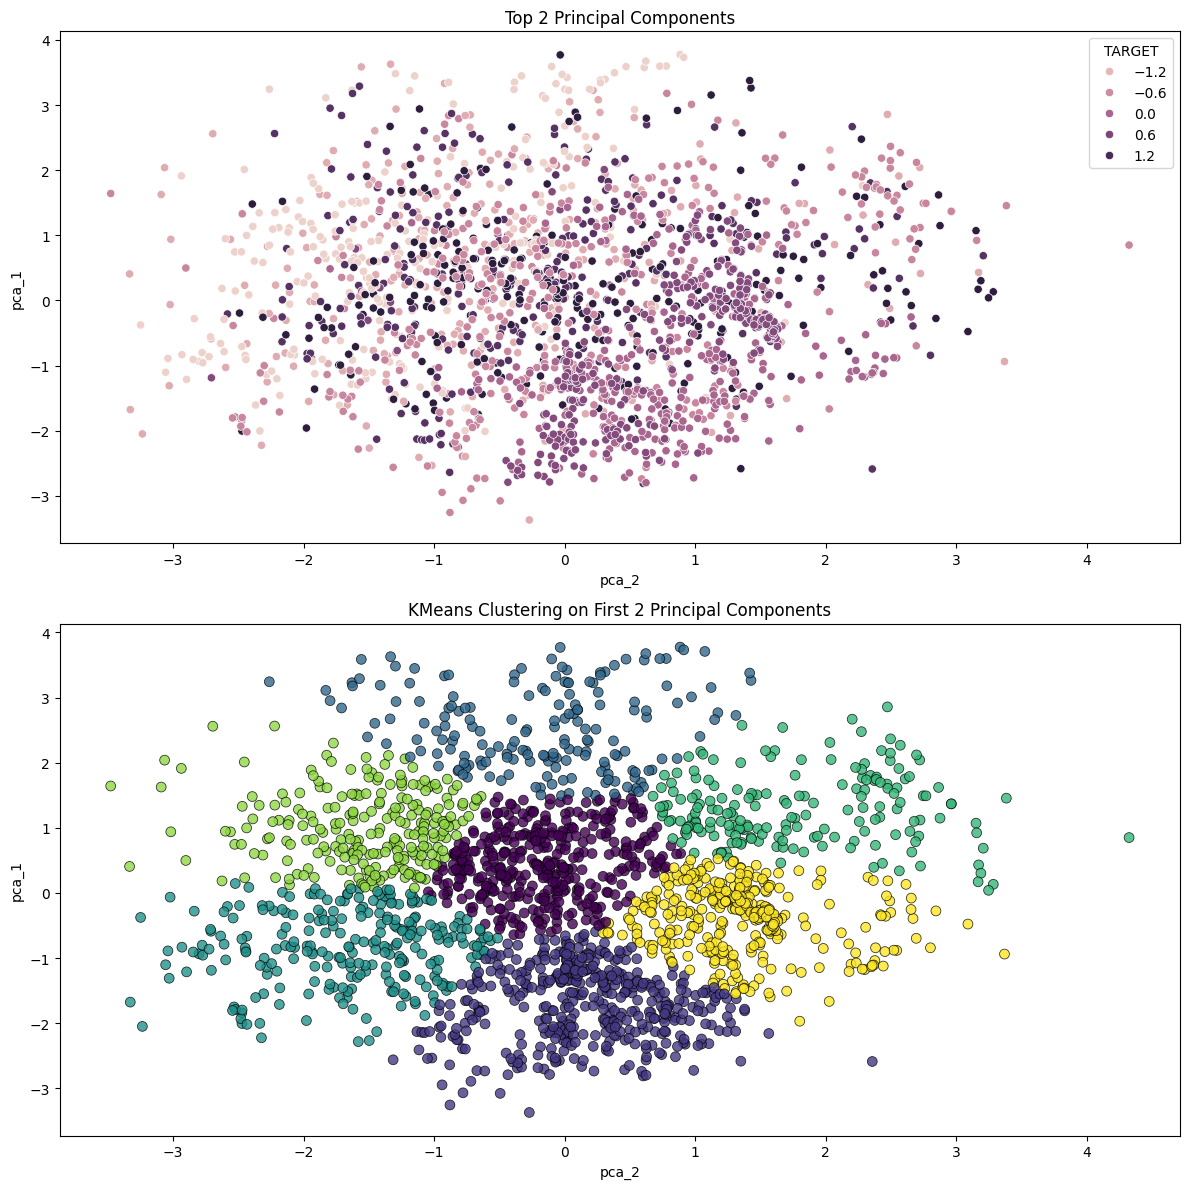

In [ ]:
RANDOM_SEED = 27

pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(Ft_reduced)
tmp = pd.DataFrame(data=pca_top_2, columns=['pca_1', 'pca_2'])
tmp['TARGET'] = df_enc['NObeyesdad']

fig, axs = plt.subplots(2, 1, figsize=(12, 12))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET', ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

k_means = KMeans(n_clusters=7, random_state=RANDOM_SEED)
k_means.fit(tmp[['pca_1', 'pca_2']])
tmp['Cluster'] = k_means.labels_

sns.scatterplot(y=tmp['pca_1'], x=tmp['pca_2'], c=tmp['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8, ax=axs[1])
axs[1].set_title("KMeans Clustering on First 2 Principal Components")

plt.tight_layout()
plt.show()


Silhouette Score: 0.3730
Davies-Bouldin Score: 0.8202


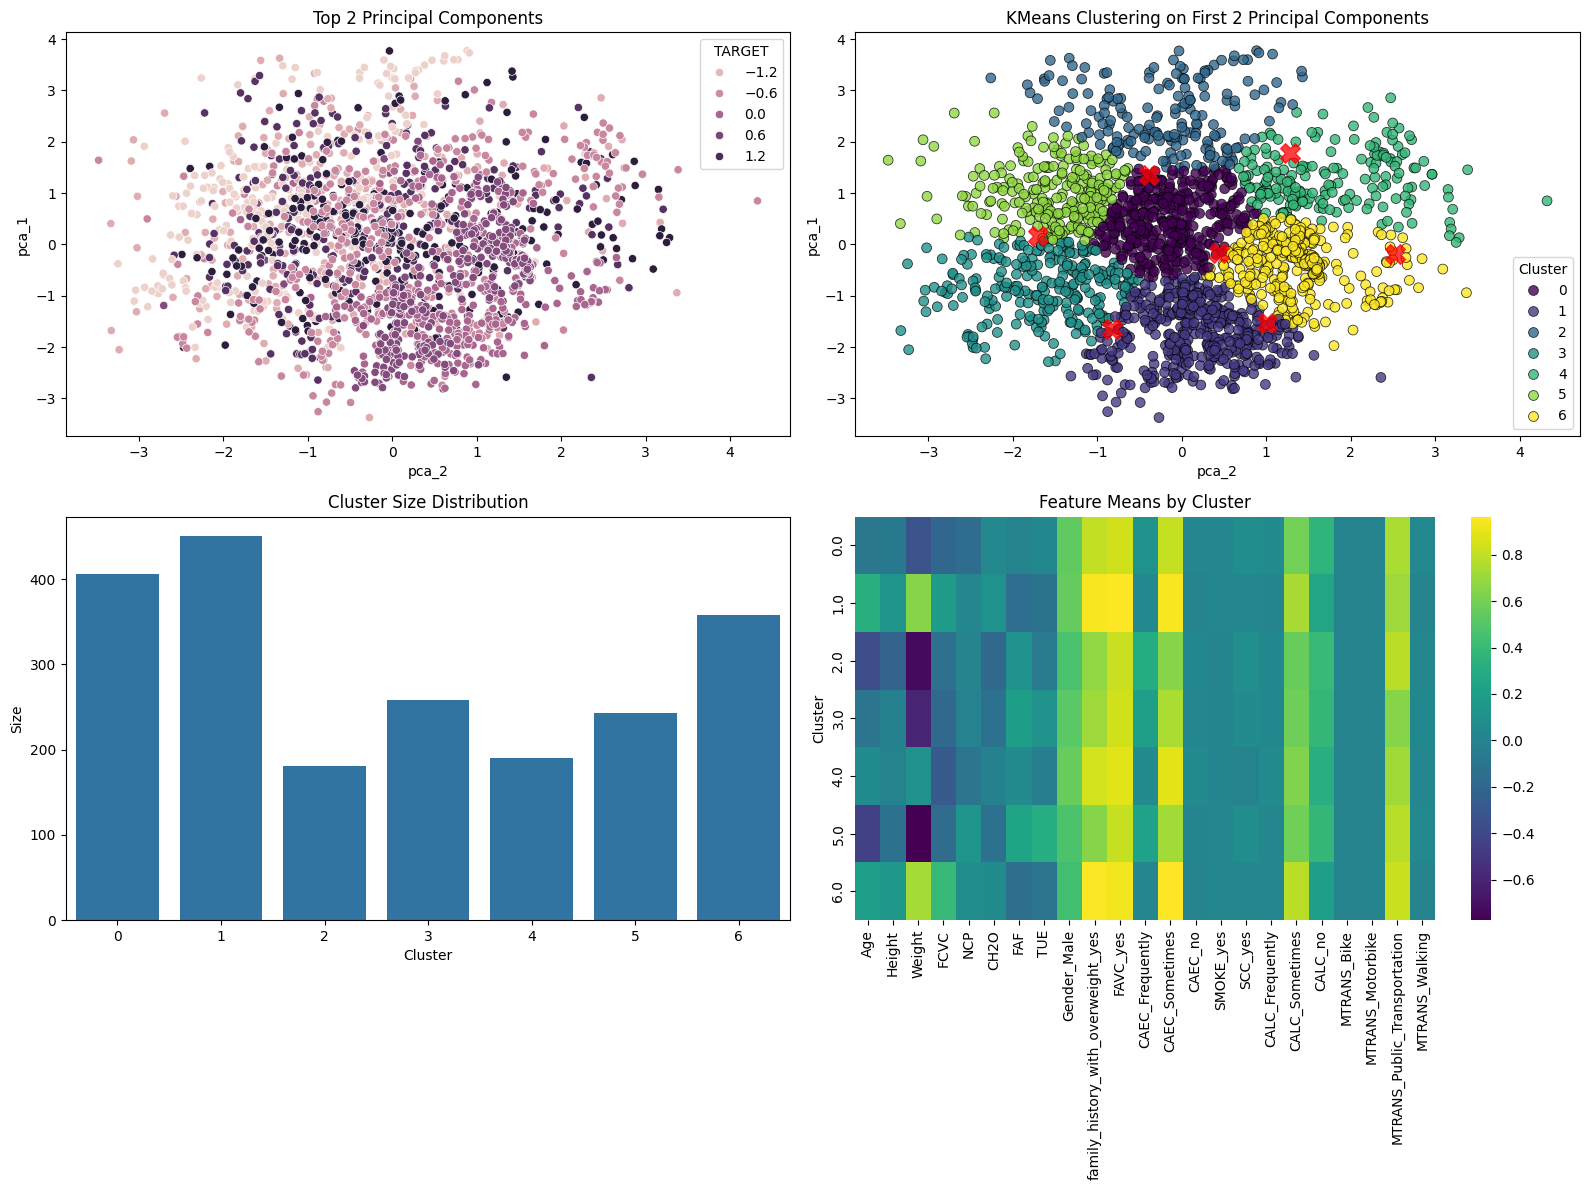

In [ ]:
RANDOM_SEED = 27

pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(Ft_reduced)
tmp = pd.DataFrame(data=pca_top_2, columns=['pca_1', 'pca_2'])
tmp['TARGET'] = df_enc['NObeyesdad']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET', ax=axs[0, 0])
axs[0, 0].set_title("Top 2 Principal Components")

k_means = KMeans(n_clusters=7, random_state=RANDOM_SEED)
k_means.fit(tmp[['pca_1', 'pca_2']])
tmp['Cluster'] = k_means.labels_

sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='Cluster', palette='viridis', ax=axs[0, 1], edgecolor='k', s=50, alpha=0.8)
axs[0, 1].set_title("KMeans Clustering on First 2 Principal Components")

centers = k_means.cluster_centers_
axs[0, 1].scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

sil_score = silhouette_score(tmp[['pca_1', 'pca_2']], tmp['Cluster'])
db_score = davies_bouldin_score(tmp[['pca_1', 'pca_2']], tmp['Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies-Bouldin Score: {db_score:.4f}")

cluster_sizes = tmp['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, ax=axs[1, 0])
axs[1, 0].set_title("Cluster Size Distribution")
axs[1, 0].set_xlabel("Cluster")
axs[1, 0].set_ylabel("Size")

df_enc['Cluster'] = tmp['Cluster']

cluster_means = df_enc.groupby('Cluster').mean().drop(columns='NObeyesdad')
sns.heatmap(cluster_means, cmap='viridis', ax=axs[1, 1])
axs[1, 1].set_title("Feature Means by Cluster")

plt.tight_layout()
plt.show()


KMeans Silhouette Score: 0.3730
KMeans Davies-Bouldin Score: 0.8202
Agglomerative Silhouette Score: 0.3163
Agglomerative Davies-Bouldin Score: 0.8778


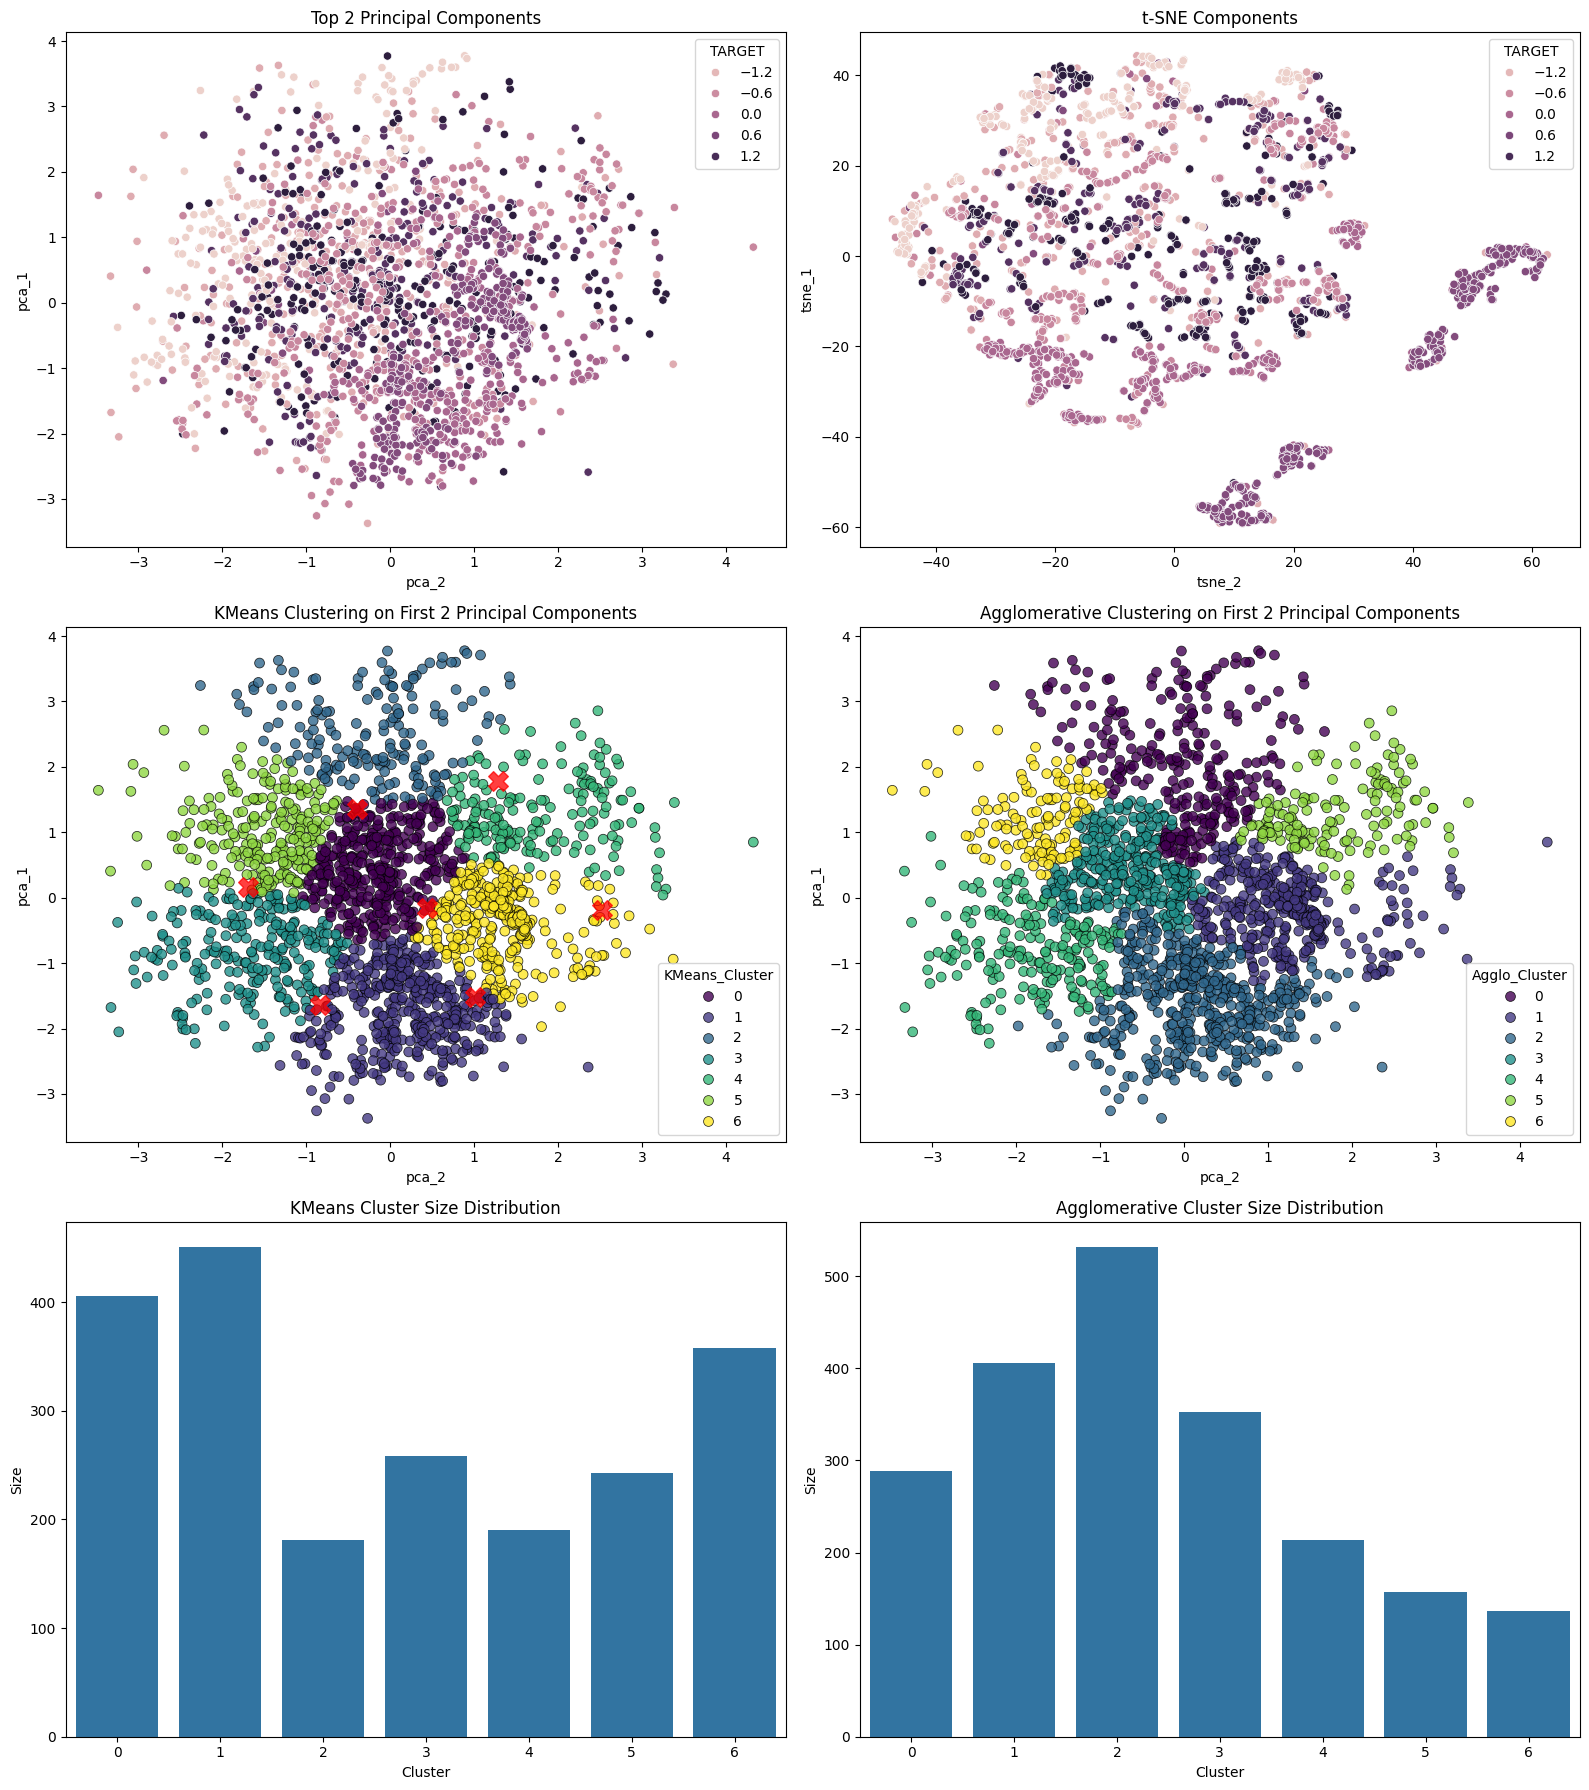

In [ ]:
RANDOM_SEED = 27

pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(Ft_reduced)
tmp = pd.DataFrame(data=pca_top_2, columns=['pca_1', 'pca_2'])
tmp['TARGET'] = df_enc['NObeyesdad']

tsne = TSNE(n_components=2, random_state=RANDOM_SEED)
tsne_results = tsne.fit_transform(Ft_reduced)
tmp_tsne = pd.DataFrame(data=tsne_results, columns=['tsne_1', 'tsne_2'])
tmp_tsne['TARGET'] = df_enc['NObeyesdad']

fig, axs = plt.subplots(3, 2, figsize=(16, 18))

sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET', ax=axs[0, 0])
axs[0, 0].set_title("Top 2 Principal Components")

sns.scatterplot(data=tmp_tsne, y="tsne_1", x="tsne_2", hue='TARGET', ax=axs[0, 1])
axs[0, 1].set_title("t-SNE Components")

k_means = KMeans(n_clusters=7, random_state=RANDOM_SEED)
k_means.fit(tmp[['pca_1', 'pca_2']])
tmp['KMeans_Cluster'] = k_means.labels_

sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='KMeans_Cluster', palette='viridis', ax=axs[1, 0], edgecolor='k', s=50, alpha=0.8)
axs[1, 0].set_title("KMeans Clustering on First 2 Principal Components")
centers = k_means.cluster_centers_
axs[1, 0].scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')

agglo = AgglomerativeClustering(n_clusters=7)
agglo_labels = agglo.fit_predict(tmp[['pca_1', 'pca_2']])
tmp['Agglo_Cluster'] = agglo_labels

sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='Agglo_Cluster', palette='viridis', ax=axs[1, 1], edgecolor='k', s=50, alpha=0.8)
axs[1, 1].set_title("Agglomerative Clustering on First 2 Principal Components")

kmeans_sil_score = silhouette_score(tmp[['pca_1', 'pca_2']], tmp['KMeans_Cluster'])
kmeans_db_score = davies_bouldin_score(tmp[['pca_1', 'pca_2']], tmp['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_sil_score:.4f}")
print(f"KMeans Davies-Bouldin Score: {kmeans_db_score:.4f}")

agglo_sil_score = silhouette_score(tmp[['pca_1', 'pca_2']], tmp['Agglo_Cluster'])
agglo_db_score = davies_bouldin_score(tmp[['pca_1', 'pca_2']], tmp['Agglo_Cluster'])
print(f"Agglomerative Silhouette Score: {agglo_sil_score:.4f}")
print(f"Agglomerative Davies-Bouldin Score: {agglo_db_score:.4f}")

kmeans_cluster_sizes = tmp['KMeans_Cluster'].value_counts().sort_index()
sns.barplot(x=kmeans_cluster_sizes.index, y=kmeans_cluster_sizes.values, ax=axs[2, 0])
axs[2, 0].set_title("KMeans Cluster Size Distribution")
axs[2, 0].set_xlabel("Cluster")
axs[2, 0].set_ylabel("Size")

agglo_cluster_sizes = tmp['Agglo_Cluster'].value_counts().sort_index()
sns.barplot(x=agglo_cluster_sizes.index, y=agglo_cluster_sizes.values, ax=axs[2, 1])
axs[2, 1].set_title("Agglomerative Cluster Size Distribution")
axs[2, 1].set_xlabel("Cluster")
axs[2, 1].set_ylabel("Size")

plt.tight_layout()
plt.show()


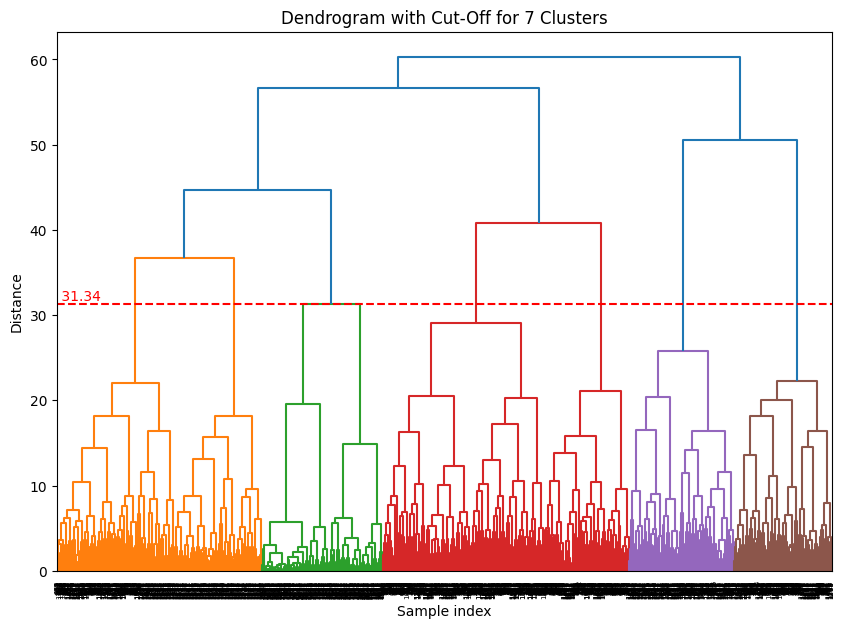

In [ ]:
linked = linkage(Ft_reduced, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

cut_distance = linked[-7, 2]

plt.axhline(y=cut_distance, color='r', linestyle='--')

plt.text(0, cut_distance, f' {cut_distance:.2f}', color='red', va='bottom', ha='left')

plt.title('Dendrogram with Cut-Off for 7 Clusters')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
